In [1]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
#pd.options.display.max_rows = 100

import seaborn as sns 
import indicoio
import sys
sys.path.append("../../Code")
import utils
sys.path.append("../../Tools/python-client")
from __future__ import print_function
import time
from pprint import pprint
import settings as s
import images as im
import cognitive as cog
import files as f
import languages as lang
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
reviews = pd.read_csv(os.path.join('..','2','nr_restrict_reviews.csv'), index_col=0)

In [5]:
sent_reviews = pd.read_csv(os.path.join('..','3','final_sat.csv'), index_col=0)

In [6]:
sent_cols = ['mixed_score']

In [7]:
score_reviews = reviews.join(sent_reviews[['id']+sent_cols].set_index('id'), on='id').reset_index(drop=True)

In [8]:
score_reviews

,idGuestReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,other_langs,translated,mixed_score
0,441,22938,2010-01-03,61471,4989,7118,Good location - easy access to Times Square an...,N,40,5,en,1.0,en,0.999997,0,NaN,0.763902
1,442,234213,2011-04-21,446902,4989,7118,We had the best possible time in NYC and Russe...,N,88,8,en,1.0,en,0.999995,0,NaN,0.837235
2,443,264416,2011-05-15,540879,4989,7118,Three of us stayed at this place for a week- i...,N,43,4,en,1.0,en,0.999997,0,NaN,0.700159
3,444,843520,2012-01-06,1357796,4989,7118,A great apartment in the perfect location. I w...,N,20,2,en,1.0,en,0.999998,0,NaN,0.623060
4,445,993034,2012-03-12,1757830,4989,7118,Russ is an amazing host and his awesome apartm...,N,73,5,en,1.0,en,0.999995,0,NaN,0.704661
5,446,1119849,2012-04-12,2019278,4989,7118,"The apartment was really nice, like in the pic...",N,15,2,en,1.0,en,0.999996,0,NaN,0.692931
6,447,1129816,2012-04-14,1857814,4989,7118,"Great location! It was stylish, fun and smell...",N,29,5,en,1.0,en,0.999998,['so'],"Great location!It was stylish, fun and smelled...",0.776882
7,448,1292160,2012-05-16,161198,4989,7118,"Russ was very nice with us, so was his neighbo...",N,47,4,en,1.0,en,0.999997,0,NaN,0.625669
8,449,1624497,2012-07-03,1810355,4989,7118,Excellent location. Small and a little crampe...,N,17,2,en,1.0,en,0.999997,['fr'],Excellent location.Small and a little cramped ...,0.544707
9,450,4367295,2013-04-30,5542661,4989,7118,We had a great experience staying with Russ re...,N,78,6,en,1.0,en,0.999997,0,NaN,0.732415


In [9]:
host_avgs = score_reviews.groupby("recipient_id").mean()[sent_cols]

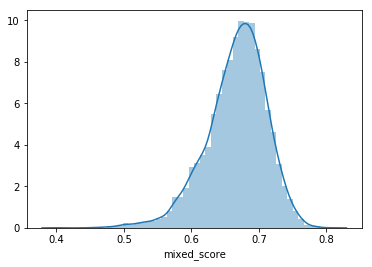

In [10]:
sns.distplot(host_avgs['mixed_score'])
plt.show()

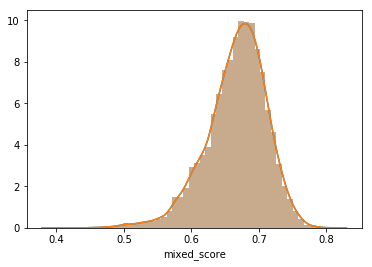

In [14]:
sns.distplot(host_avgs.mixed_score)
plt.show()

In [24]:
host_avgs = host_avgs.rename(columns={'mixed_score':'average_satisfaction'})

In [25]:
host_avgs.to_csv("host_avgs.csv")

In [26]:
sent = score_reviews[['id', 'recipient_id', 'reviewer_id', 'mixed_score']].rename(columns={'mixed_score':'satisfaction'})

In [28]:
sent = sent.join(host_avgs[['average_satisfaction']], on='recipient_id')

In [29]:
sent['relative_satisfaction'] = sent['satisfaction'] - sent['average_satisfaction'] 

In [33]:
sent.to_csv("satisfaction_scores.csv")

In [41]:
below_avg_hosts = host_avgs[host_avgs['average_satisfaction'] < 0.6].index